In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_distr = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data_distr.head().transpose()

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [3]:
data_distr.shape

(48895, 16)

In [4]:
print(data_distr.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
from sklearn.preprocessing import MinMaxScaler

dtDistrib = data_distr.dropna()

dtDistrib['last_review'] = pd.to_datetime(dtDistrib['last_review'], errors='coerce')

dtDistrib = dtDistrib.drop_duplicates()

price_threshold = dtDistrib['price'].quantile(0.99)
dtDistrib = dtDistrib[dtDistrib['price'] <= price_threshold]

dtDistrib['neighbourhood_group'] = dtDistrib['neighbourhood_group'].str.lower()

scaler = MinMaxScaler()
dtDistrib[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']] = scaler.fit_transform(
    dtDistrib[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']]
)

dtDistrib.to_csv('cleaned_AB_NYC_2019.csv', index=False)

print(dtDistrib.head().transpose())

/tmp/ipykernel_10817/1963938706.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtDistrib['last_review'] = pd.to_datetime(dtDistrib['last_review'], errors='coerce')


                                                                 0  \
id                                                            2539   
name                            Clean & quiet apt home by the park   
host_id                                                       2787   
host_name                                                     John   
neighbourhood_group                                       brooklyn   
neighbourhood                                           Kensington   
latitude                                                  40.64749   
longitude                                                -73.97237   
room_type                                             Private room   
price                                                     0.222388   
minimum_nights                                                 0.0   
number_of_reviews                                         0.012739   
last_review                                    2018-10-19 00:00:00   
reviews_per_month   

In [6]:
num_cols = dtDistrib.select_dtypes(include=[float, int])

In [7]:
print(num_cols.describe())

                 id       host_id      latitude     longitude         price  \
count  3.843200e+04  3.843200e+04  38432.000000  38432.000000  38432.000000   
mean   1.809193e+07  6.409760e+07     40.728043    -73.950906      0.195299   
std    1.069285e+07  7.581137e+07      0.055126      0.046777      0.136328   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420      0.000000   
25%    8.718985e+06  7.028286e+06     40.688550    -73.982323      0.101493   
50%    1.886831e+07  2.828340e+07     40.721470    -73.954580      0.149254   
75%    2.755470e+07  1.016113e+08     40.763072    -73.934720      0.246269   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990      1.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38432.000000       38432.000000       38432.000000   
mean         0.003882           0.045271           1.377896   
std          0.013881           0.076971           1.684326   
min          0.000000           0.00

In [8]:
dtDistrib.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38432 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              38432 non-null  int64         
 1   name                            38432 non-null  object        
 2   host_id                         38432 non-null  int64         
 3   host_name                       38432 non-null  object        
 4   neighbourhood_group             38432 non-null  object        
 5   neighbourhood                   38432 non-null  object        
 6   latitude                        38432 non-null  float64       
 7   longitude                       38432 non-null  float64       
 8   room_type                       38432 non-null  object        
 9   price                           38432 non-null  float64       
 10  minimum_nights                  38432 non-null  float64       
 11  number_

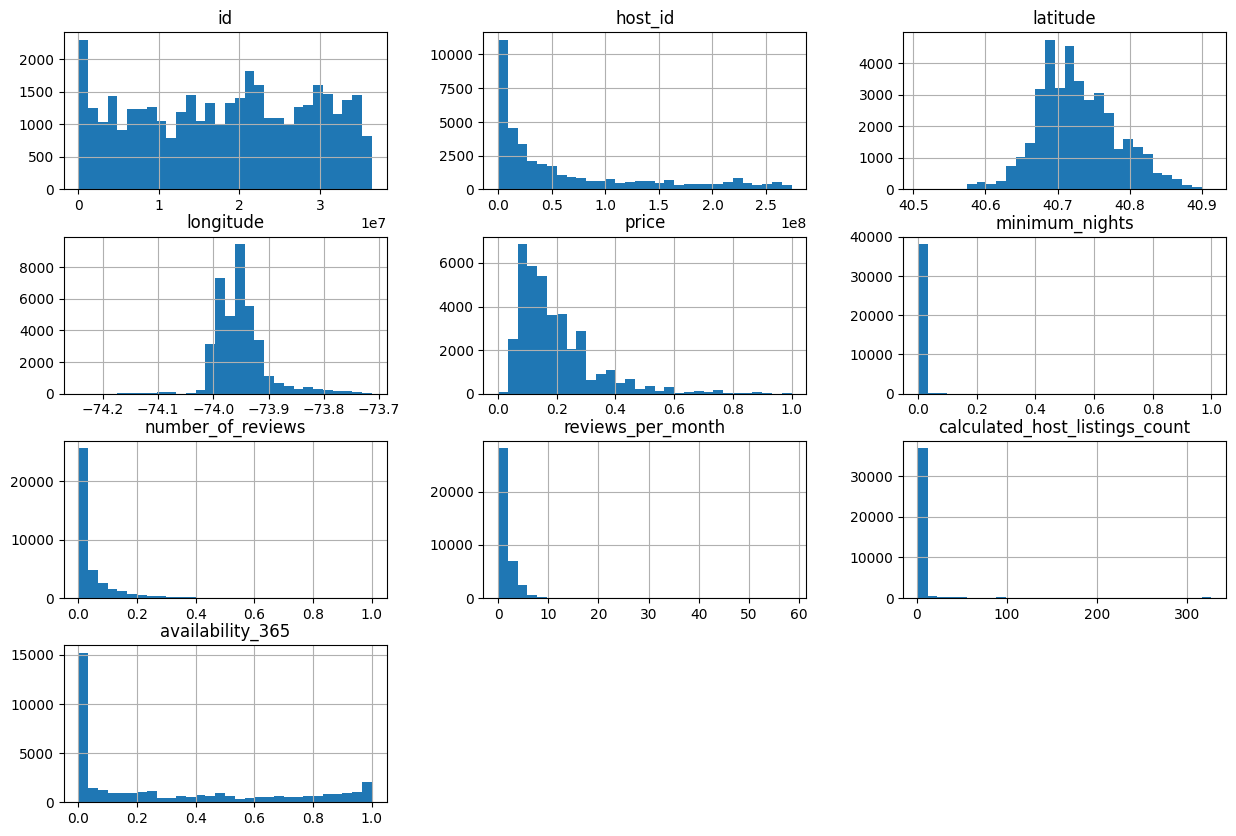

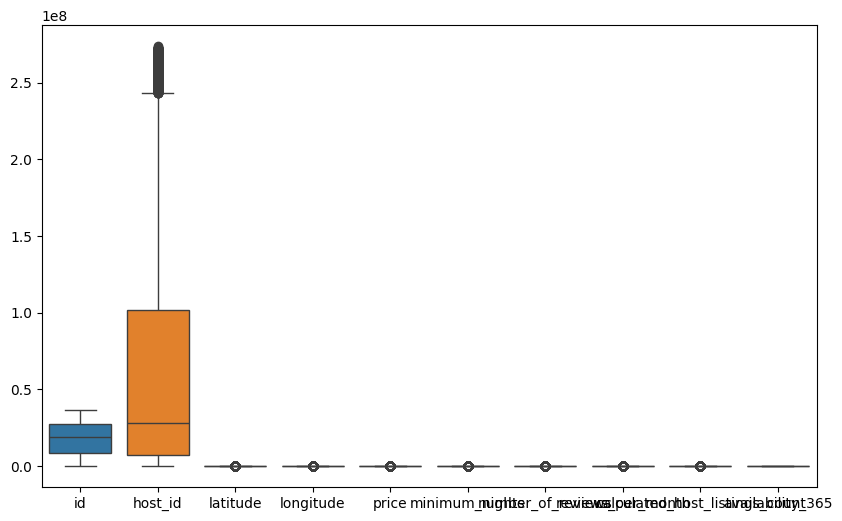

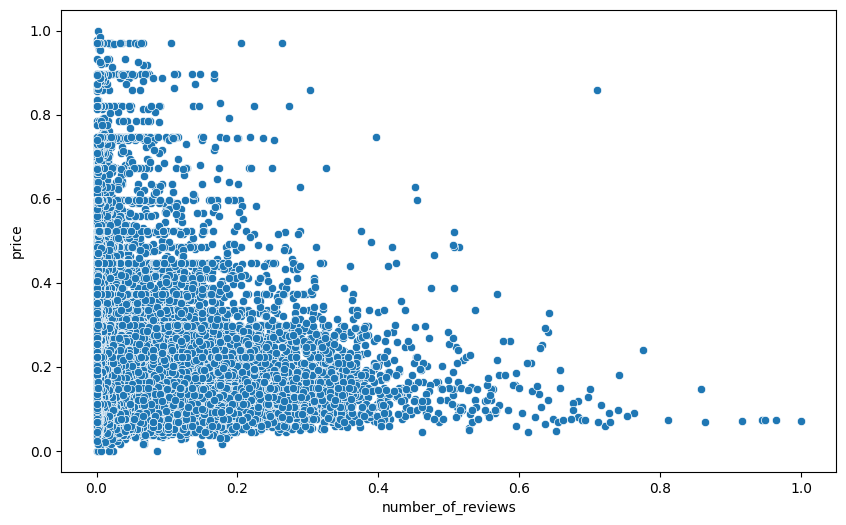

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.590850 -0.011002   0.104446   
host_id                         0.590850  1.000000  0.011568   0.143415   
latitude                       -0.011002  0.011568  1.000000   0.089564   
longitude                       0.104446  0.143415  0.089564   1.000000   
price                          -0.006456  0.008117  0.050728  -0.281299   
minimum_nights                 -0.073658 -0.052178  0.024600  -0.055731   
number_of_reviews              -0.330107 -0.141391 -0.007881   0.053702   
reviews_per_month               0.291733  0.296804 -0.009727   0.145954   
calculated_host_listings_count  0.097710  0.147804  0.003597  -0.093789   
availability_365                0.005774  0.155443 -0.023842   0.107970   

                                   price  minimum_nights  number_of_reviews  \
id                             -0.006456       -0.073658          -0.330107   
host_id         

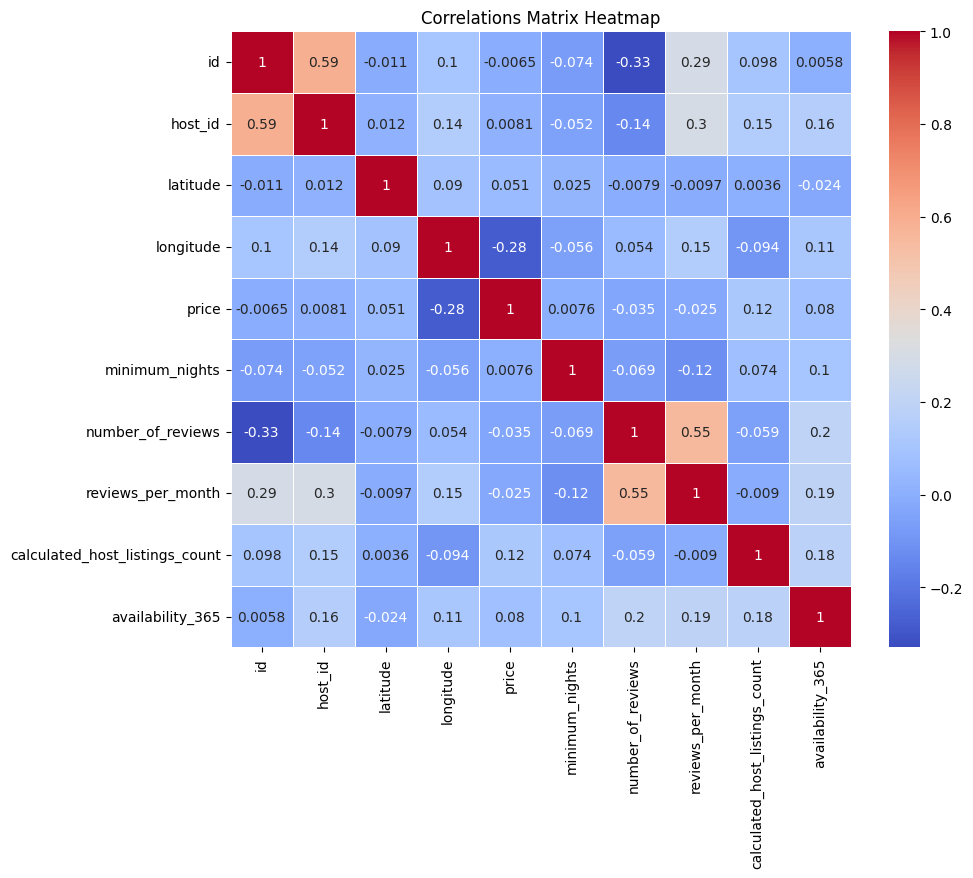

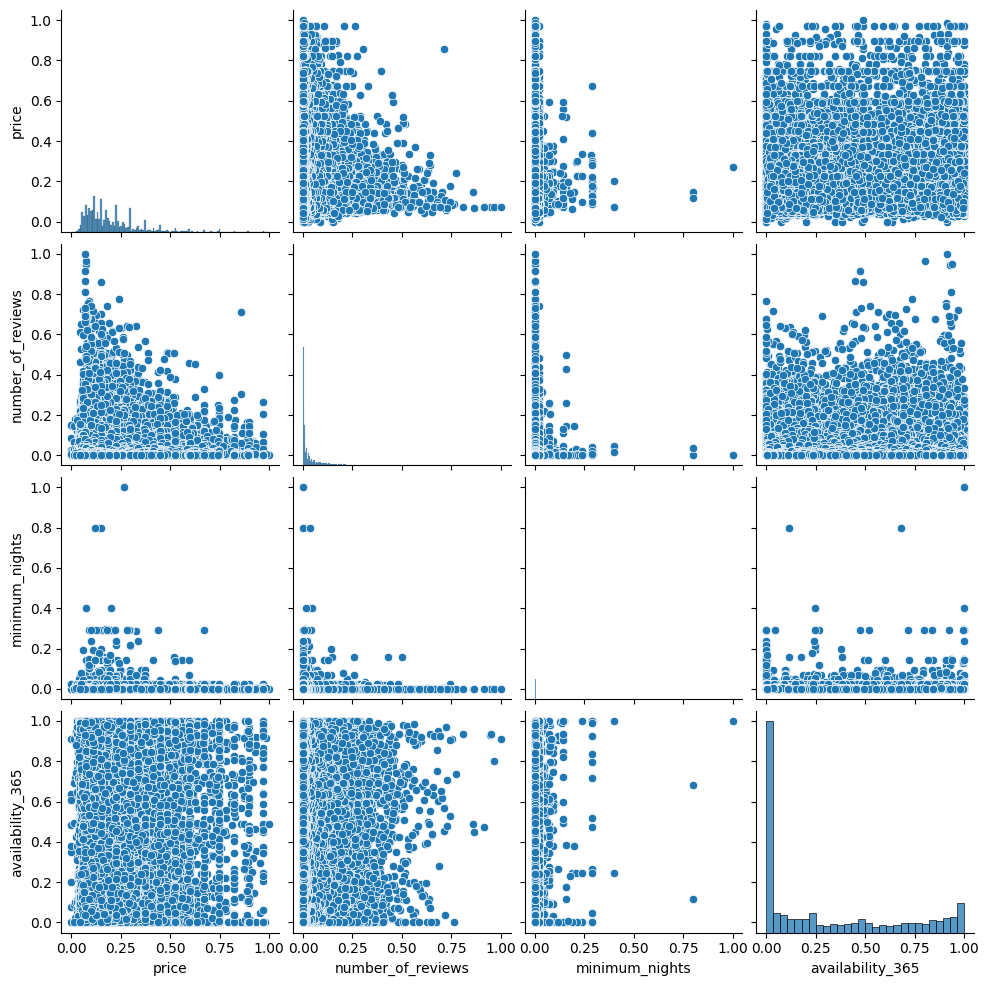

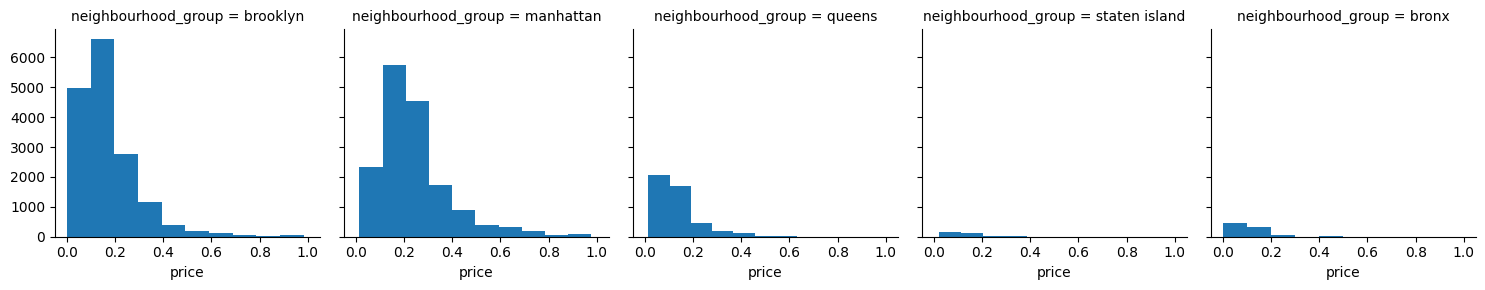

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_cols.hist(bins = 30, figsize = (15, 10))
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=num_cols)
plt.show

plt.figure(figsize=(10, 6))
sns.scatterplot(x = 'number_of_reviews', y = 'price', data = dtDistrib)
plt.show()

correlation_matrix = num_cols.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidths = 0.5)
plt.title('Correlations Matrix Heatmap')
plt.show()

sns.pairplot(dtDistrib[['price', 'number_of_reviews', 'minimum_nights', 'availability_365']])
plt.show()

gridNeighbourhoods = sns.FacetGrid(dtDistrib, col='neighbourhood_group')
gridNeighbourhoods.map(plt.hist, 'price')
plt.show()

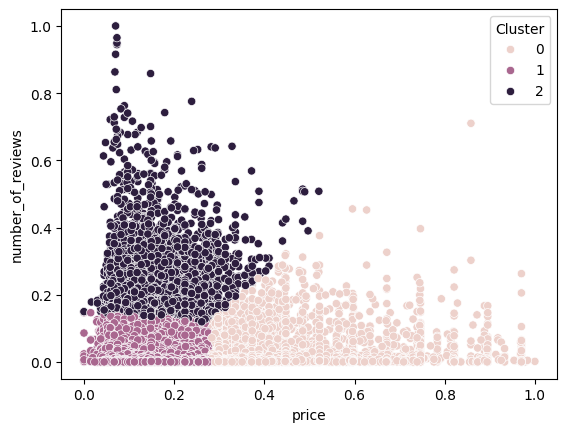

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(num_cols[['price', 'number_of_reviews']])
num_cols['Cluster'] = kmeans.labels_
sns.scatterplot(x='price', y='number_of_reviews', hue='Cluster', data=num_cols)
plt.show()

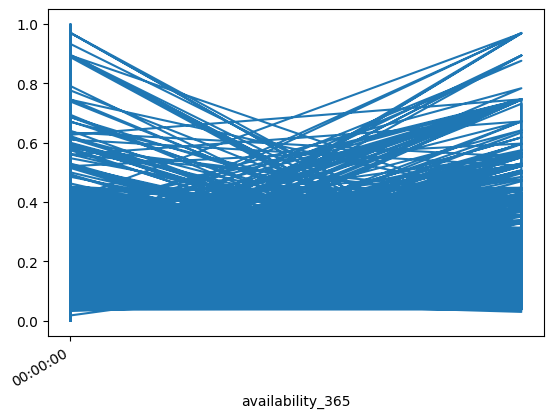

In [11]:
num_cols['availability_365'] = pd.to_datetime(num_cols['availability_365'])
num_cols.set_index('availability_365', inplace=True)
num_cols['price'].plot() 
plt.show()

In [12]:
from scipy.stats import ttest_ind, f_oneway

t_stat, p_val = ttest_ind(dtDistrib[dtDistrib['neighbourhood_group']=='Manhattan']['price'],dtDistrib[dtDistrib['neighbourhood_group']=='Brooklyn']['price'])

print(f"T-Test: t_stat={t_stat}, p_val={p_val}")

T-Test: t_stat=nan, p_val=nan


/tmp/ipykernel_10817/3990540528.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_val = ttest_ind(dtDistrib[dtDistrib['neighbourhood_group']=='Manhattan']['price'],dtDistrib[dtDistrib['neighbourhood_group']=='Brooklyn']['price'])


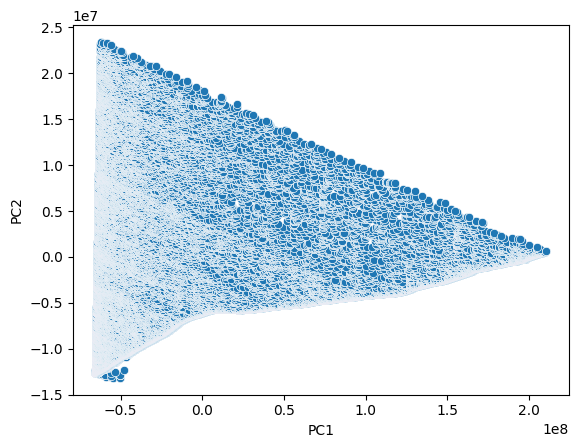

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(dtDistrib.select_dtypes(include=[float, int]))
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.show()

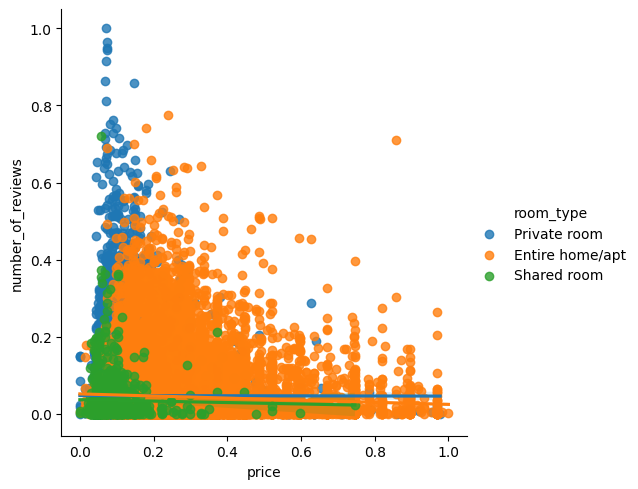

In [14]:
sns.lmplot(x='price', y='number_of_reviews', hue='room_type', data=dtDistrib)
plt.show()